# PyLadies Tokyo #6 demo

## はじめに

このファイルはPyLadies Tokyo meet up \#6 (2015/06/20)のために作成したデモファイルです。

## 1. Import Packcages

1. Pythonでデータ解析をするためには必要なパッケージをインポートする必要があります。
2. 以下のセルで示しているように、import xxxxというかたちでインポートします。
3. 一行目の「%matplotlib inline」はmatplotlibの図をipython notebookあるいはJupiterでmatplotlibの図を表示するために必要です。

【備考】
* 起動時に  
```
ipython notebook --matplotlib inline
```
と入力して起動することにより図の表示を可能にする方法もあります。
```
ipython notebook --pylab inline
```
として起動する方法は非推奨です（2015/06/20現在）。  
  
【参考サイト】http://yagays.github.io/blog/2014/08/15/ipython-notebook-matplotlib-inline/

#####Impor packages

In [1]:
%matplotlib inline 
# ↑matplotlibで書いた図を表示するために必要

# パッケージのインポート
import numpy as np #numpyをnpと省略（一般的な方法）
import pandas as pd #pandasをpdと省略（一般的な方法）
import matplotlib.pyplot as plt # 作図用
import scipy

from matplotlib import lines
from pandas import DataFrame
from sympy import init_printing

## 2. データセットの作成

### 2.1 データセット1

In [2]:
# Data for Fig. 1
a = 2
b = 1

# Numpyの数列の作成（2, 3, ..., 22）
x11 = np.array(range(2, 22))

# a, b, x11からy11を生成
y11 = a * x11 + b

# x11, y11

In [3]:
# Data for Fig. 2

# Numpyの数列の作成
x12 = np.array(range(2, 22))

# y11を生成（y11を平均値と仮定し、標準偏差を与えて値をばらつかせる）
y12 = np.empty(20) # 初期化されていない行列を作成
sd = 5 # 標準偏差

for i in range(20):
    ydat = np.random.normal(y11[i], sd, 1)
    y12[i] = ydat

# x12, y12

In [4]:
# Data for Fig. 3

c = -0.3
d = 15
f = 40

# Numpyの数列の作成
x13 = np.array(range(2, 22))

# c, d, f, x13からyの値を生成
y13 = c * ( x13 - d ) ** 2 + f 

# x13, y13

In [5]:
# Data for Fig.4
a2 = 1
b2 = 1

# Numpyの数列の作成
x141 = np.array(range(2, 22))

# a2, b2, x141からy141を生成
y141 = a2 * x141 + b2


y142 = np.empty(20) # 初期化されていない行列を作成
sd = 3 # 標準偏差

for i in range(20):
    ydat3 = np.random.normal(y141[i], sd, 1)
    y142[i] = ydat3

x14 = np.array(range(2, 22))
x14[:19] = x141[:19] * 0.5
y14 = y142
y14[:19] = y142[:19] * 0.4
y14[19] = y14[19] * 2

# x14, y14

### 2.2 データセット2

In [6]:
# 平均値
mu_y21 = 3
mu_y22 = 10
mu_x21 = 2
mu_x22 = 5

# 標準偏差
sd_y21 = 2
sd_y22 = 1
sd_x21 = 1
sd_x22 = 0.5

# mean±sdに従う乱数を1000個発生
y21 = np.random.normal(mu_y21, sd_y21, 1000)
y22 = np.random.normal(mu_y22, sd_y22, 1000)
x21 = np.random.normal(mu_x21, sd_x21, 1000)
x22 = np.random.normal(mu_x22, sd_x22, 1000)

# 一つのデータセットとしてまとめる
# 要素が初期化されていない空行列を生成
y2 = np.zeros(2000) 
x2= np.zeros(2000)

# データを代入
y2[:1000] = y21
y2[1000:2001] = y22
x2[:1000] = x21
x2[1000:2001] = x22

## 3. データを俯瞰する

#### データセット1

Data for Fig.1-1

In [7]:
x11, y11

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21]),
 array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37,
        39, 41, 43]))

Data for Fig. 1-2

In [8]:
x12, y12

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21]),
 array([  5.95023144,  11.75965011,  10.00789045,   2.33448128,
         10.91054883,  15.05488362,  17.24982134,  19.63680433,
         24.57395071,  16.05217653,  29.9864491 ,  22.99076916,
         25.23359561,  19.48601724,  28.65374734,  38.76781732,
         33.72243571,  43.09002007,  34.31120985,  43.53382497]))

Data for Fig. 1-3

In [9]:
x13, y13

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21]),
 array([-10.7,  -3.2,   3.7,  10. ,  15.7,  20.8,  25.3,  29.2,  32.5,
         35.2,  37.3,  38.8,  39.7,  40. ,  39.7,  38.8,  37.3,  35.2,
         32.5,  29.2]))

Data for Fig. 1-4

In [10]:
x14, y14

(array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
         9, 10, 21]),
 array([  1.22827516e+00,   2.09012961e-02,   3.00166448e+00,
          2.38104924e+00,   1.95671573e+00,   5.09880935e+00,
          5.19896342e+00,   3.55295763e+00,   3.64673864e+00,
          5.30955806e+00,   5.02233257e+00,   6.42505292e+00,
          9.12822117e+00,   4.45419923e+00,   6.73692504e+00,
          7.22763838e+00,   5.62306738e+00,   8.96710015e+00,
          8.07745286e+00,   4.23849753e+01]))

#### データセット2

Data for Fig. 2

In [11]:
x2, y2

(array([ 1.61811695,  2.16438634,  1.28828359, ...,  4.8845206 ,
         5.00797025,  4.89871453]),
 array([  4.35993421,   4.97629238,   3.7323972 , ...,   9.43024052,
          6.70145353,  10.3063519 ]))

#### データセット1
##### ｘのヒストグラム

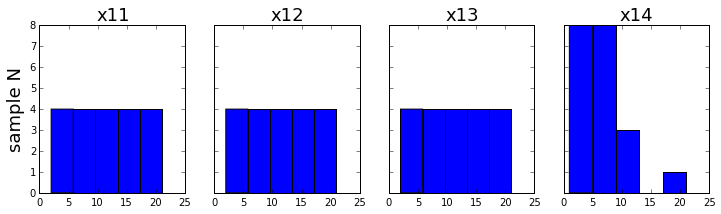

In [12]:
f, (axx1, axx2, axx3, axx4) = plt.subplots(1, 4, sharey='row', figsize = (12, 3))

axx1.hist(x11, bins = 5)
axx2.hist(x12, bins = 5)
axx3.hist(x13, bins = 5)
axx4.hist(x14, bins = 5)

axx1.set_title('x11', fontsize=18)
axx2.set_title('x12', fontsize=18)
axx3.set_title('x13', fontsize=18)
axx4.set_title('x14', fontsize=18)

axx1.set_ylabel('sample N', fontsize=18) # y軸


##### yのヒストグラム

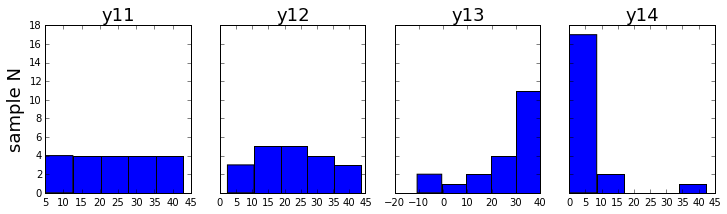

In [13]:
f, (axy1, axy2, axy3, axy4) = plt.subplots(1, 4, sharey='row', figsize = (12, 3)) # 
axy1.hist(y11, bins = 5)
axy2.hist(y12, bins = 5)
axy3.hist(y13, bins = 5)
axy4.hist(y14, bins = 5)

axy1.set_title('y11', fontsize=18)
axy2.set_title('y12', fontsize=18)
axy3.set_title('y13', fontsize=18)
axy4.set_title('y14', fontsize=18)

axy1.set_ylabel('sample N', fontsize=18) # y軸


##### xとyの関係

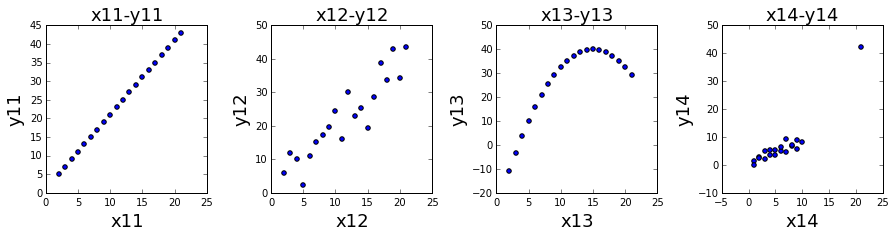

In [14]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (15, 3))
ax1.scatter(x11, y11)
ax2.scatter(x12, y12)
ax3.scatter(x13, y13)
ax4.scatter(x14, y14)

ax1.set_title('x11-y11', fontsize=18)
ax2.set_title('x12-y12', fontsize=18)
ax3.set_title('x13-y13', fontsize=18)
ax4.set_title('x14-y14', fontsize=18)

ax1.set_ylabel('y11', fontsize=18) # y軸
ax2.set_ylabel('y12', fontsize=18) # y軸
ax3.set_ylabel('y13', fontsize=18) # y軸
ax4.set_ylabel('y14', fontsize=18) # y軸

ax1.set_xlabel('x11', fontsize=18) # y軸
ax2.set_xlabel('x12', fontsize=18) # y軸
ax3.set_xlabel('x13', fontsize=18) # y軸
ax4.set_xlabel('x14', fontsize=18) # y軸

f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)

#### データセット2
##### x, yのヒストグラムとx-yの関係式

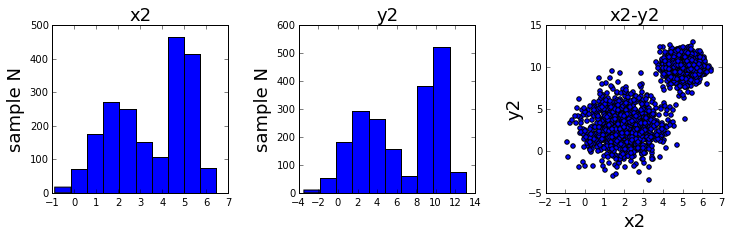

In [15]:
f, (axx5, axy5, ax5) = plt.subplots(1, 3, figsize = (12, 3))

axx5.hist(x2)
axy5.hist(y2)
ax5.scatter(x2, y2)

axx5.set_title('x2', fontsize=18)
axy5.set_title('y2', fontsize=18)
ax5.set_title('x2-y2', fontsize=18)

axx5.set_ylabel('sample N', fontsize=18)
axy5.set_ylabel('sample N', fontsize=18)

ax5.set_ylabel('y2', fontsize=18)
ax5.set_xlabel('x2', fontsize=18)

f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)

### 4. 線形回帰
####線形回帰分析

In [16]:
from scipy import stats # 統計解析（このファイルでは直線回帰）

* stats.linregress(x, y) 
* 戻り値は  
    - slope 傾き  
    - intercept 切片  
    - r-value 相関係数
    - p-value p値  
    - standard error 標準偏差  
* 結果はタプルで表示される

##### 回帰をおこなうときによく使う統計値

* 相関係数 r  
    - -1から1の値をとり、<b>絶対値が1に近いほど点が直線的に並んでいる</b>ことを意味する  


* p値  
    - 帰無仮説の下で実際にデータから計算された統計量よりも極端な統計量が観測される確率    

    - 直線回帰における帰無仮説 ＝ xの値とyの値の間に関係はない（無相関）  

    - 有意水準α（多くは0.05）のとき、<b>p<αなら帰無仮説は棄却</b>  
        ＝ xとyの値の間に関係はないとはいえない  
        ≒ <b>xとyの間には関係がある（可能性がある）</b>



In [17]:
# 回帰分析
regr1 = stats.linregress(x11, y11) 
regr2 = stats.linregress(x12, y12)
regr3 = stats.linregress(x13, y13) 
regr4 = stats.linregress(x14, y14) 
regr5 = stats.linregress(x2, y2) 
regr5

(1.8200645675029101,
 0.12069937247469564,
 0.80684198700851073,
 0.0,
 0.029813778079502605)

slope 傾き  
intercept 切片  
r-value 相関係数  
p-value p値 

In [18]:
# こういう書き方もOK
slp11, intcpt11, rval11, pval11, sd11 = stats.linregress(x11, y11)
slp12, intcpt12, rval12, pval12, sd12 = stats.linregress(x12, y12)
slp13, intcpt13, rval13, pval13, sd13 = stats.linregress(x13, y13)
slp14, intcpt14, rval14, pval14, sd14 = stats.linregress(x14, y14)
slp2, intcpt2, rval2, pval2, sd2 = stats.linregress(x2, y2)
slp2

1.8200645675029101

#### データセット1の結果
描画

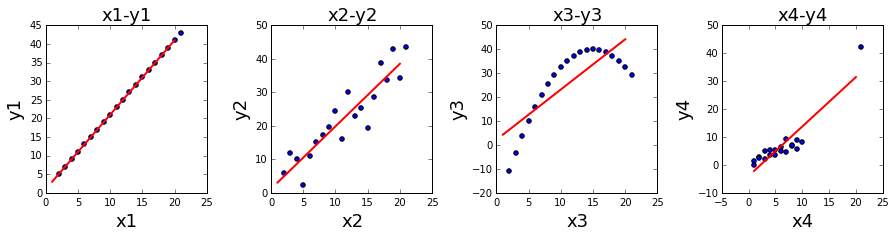

In [19]:
# 散布図の作成
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (15, 3))
ax1.scatter(x11, y11)
ax2.scatter(x12, y12)
ax3.scatter(x13, y13)
ax4.scatter(x14, y14)

ax1.set_title('x1-y1', fontsize=18)
ax2.set_title('x2-y2', fontsize=18)
ax3.set_title('x3-y3', fontsize=18)
ax4.set_title('x4-y4', fontsize=18)

ax1.set_ylabel('y1', fontsize=18) # y軸
ax2.set_ylabel('y2', fontsize=18) # y軸
ax3.set_ylabel('y3', fontsize=18) # y軸
ax4.set_ylabel('y4', fontsize=18) # y軸

ax1.set_xlabel('x1', fontsize=18) # y軸
ax2.set_xlabel('x2', fontsize=18) # y軸
ax3.set_xlabel('x3', fontsize=18) # y軸
ax4.set_xlabel('x4', fontsize=18) # y軸

f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)

# 回帰直線の描画
lregr1 = lines.Line2D([1, 20], [1 * slp11 + intcpt11, 20 * slp11 + intcpt11], 
                     color = 'r', linewidth = 2)

lregr2 = lines.Line2D([1, 20], [1 * slp12 + intcpt12, 20 * slp12 + intcpt12], 
                     color = 'r', linewidth = 2)

lregr3 = lines.Line2D([1, 20], [1 * slp13 + intcpt13, 20 * slp13 + intcpt13], 
                     color = 'r', linewidth = 2)

lregr4 = lines.Line2D([1, 20], [1 * slp14 + intcpt14, 20 * slp14 + intcpt14], 
                     color = 'r', linewidth = 2)

ax1.add_line(lregr1)
ax2.add_line(lregr2)
ax3.add_line(lregr3)
ax4.add_line(lregr4)


回帰の有意性？

In [20]:
r_p = [[regr1[2], regr1[3]], [regr2[2], regr2[3]], [regr3[2],regr3[3]], [regr4[2],regr4[3]]]

# pandasで表示
cindex = ['相関係数 r', 'p値']
lindex = ['Fig. 1', 'Fig. 2', 'Fig. 3', 'Fig. 4']
dfrp = DataFrame(r_p, index = lindex, columns = cindex)
dfrp 
# 有意水準 α=0.05

,相関係数 r,p値
Fig. 1,1.000000,9.496094e-179
Fig. 2,0.921562,8.009493e-09
Fig. 3,0.806144,1.773748e-05
Fig. 4,0.905159,4.161184e-08


* 相関係数 r -1から1、絶対値が1に近いほど点が直線的に並んでいることを意味  
* p < 0.05なら有意

いずれも有意だが、Fig. 3と4については、直線回帰でいいのか検討する必要あり。

#### データセット2の結果
描画

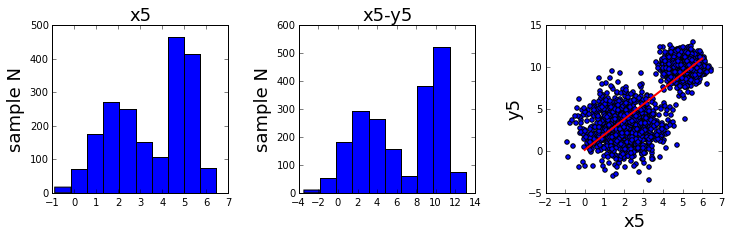

In [21]:
f, (axx5, axy5, ax5) = plt.subplots(1, 3, figsize = (12, 3))

axx5.hist(x2)
axy5.hist(y2)
ax5.scatter(x2, y2)

axx5.set_title('x5', fontsize=18)
axy5.set_title('y5', fontsize=18)
axy5.set_title('x5-y5', fontsize=18)

axx5.set_ylabel('sample N', fontsize=18)
axy5.set_ylabel('sample N', fontsize=18)

ax5.set_ylabel('y5', fontsize=18)
ax5.set_xlabel('x5', fontsize=18)

f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)

func = lambda x: x * slp2 + intcpt2
lregr = lines.Line2D([0, 6], [func(0), func(6)], c = 'r', lw = 2)
ax5.add_line(lregr)

回帰の有意性？

In [22]:
r_p2 = [[rval2, pval2]]

# pandasで表示
cindex = ['相関係数', 'p値']
lindex = ['Fig. 4']
dfrp2 = DataFrame(r_p2, index = lindex, columns = cindex)
dfrp2
# 有意水準 α=0.05

,相関係数,p値
Fig. 4,0.806842,0


有意だが、相関係数は低いし、明らかに2群に分かれているので、解析方法再考の必要あり。

### 5. 数式  

In [23]:
from sympy import *

#### 平均

$$\mu = \frac{1}{n} \sum_{k=1}^n x $$

$$= \frac{1}{n} ({x}_1 + {x}_2 + \cdots + {x}_{n})$$

#### 平均値の計算

In [24]:
# data
x = [1, 2, 3]
mu1 = (x[0] + x[1] + x[2]) / len(x)
mu1

2.0

#### 平均値の検算 by Numpy

In [25]:
x = [1, 2, 3]
mu2 = np.average(x)
mu2

2.0

#### 分散 = 標準偏差の二乗

$$\sigma^2 = \frac{1}{n} \sum_{k=1}^n (x - \mu) ^2$$

$$\mu = \frac{1}{n} \sum_{k=1}^n x $$

$$ = \frac{1}{n} [(x_1 - \mu)^2 + (x_2 - \mu)^2 + \dots + (x_n - \mu)^2 ]$$

#### 標準偏差

$$\sigma  = \sqrt{\frac{1}{n} [(x_1 - \mu)^2 + (x_2 - \mu)^2 + \dots + (x_n - \mu)^2 ]}$$

#### 標準偏差の計算

In [26]:
sd1 = sqrt(((x[0]-mu1) ** 2 + (x[1]-mu1) ** 2 + (x[2]-mu1) ** 2) / len(x))
sd1

0.816496580927726

#### 標準偏差の検算 by Numpy

In [27]:
np.std(x)

0.81649658092772603

#### Sympyを使った標準偏差の計算

In [28]:
a, b = symbols('a b') # 記号を定義
d = (a - b) ** 2
d

(a - b)**2

In [30]:
dd = np.array(np.empty(3))

for i in range(len(x)):
    dd[i] = d.subs([(a, x[i]), (b, mu1)])

sd2 = sqrt((dd[0] + dd[1] + dd[2]) / len(x))
sd2

0.816496580927726

##### 蛇足ですが、Sympyは関数展開も出来ます

In [31]:
expand(d)

a**2 - 2*a*b + b**2

参考サイト
1. 作図  
http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot  

2. Sympy  
http://www.sympy.org/en/index.html    
http://nbviewer.ipython.org/github/ipython/ipython/blob/2.x/examples/Notebook/Typesetting%20Math%20Using%20MathJax.ipynb    